In [87]:
import os
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib as mpl
import numpy as np # linear algebra
#load data
train = pd.read_csv('E:\\18C047\\data_science_using_python\\StudentsPerformance.csv')

In [5]:
total_data = pd.concat([train], ignore_index=True)
numerical_data=total_data.select_dtypes(exclude=[object])
print(numerical_data.shape)

(1000, 3)


VISUALISATION

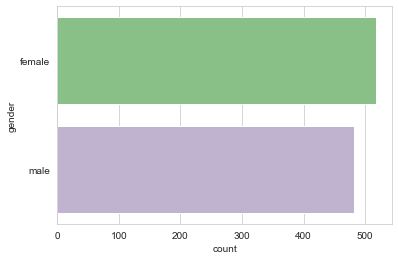

In [15]:
sns.set_style('whitegrid')
sns.countplot(y='gender',data=train,palette='Accent')
plt.show()


In [16]:
female_count = len(train[train['gender']=='female'])
male_count = 1000 - female_count
print("female count is:",female_count,"\n","male count is:",male_count)

female count is: 518 
 male count is: 482


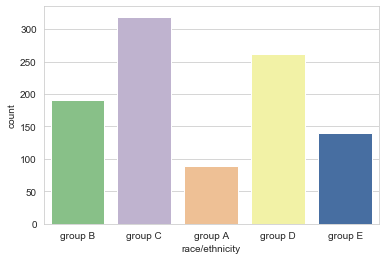

In [18]:
sns.set_style('whitegrid')
sns.countplot(x='race/ethnicity',data=train,palette='Accent')
plt.show()


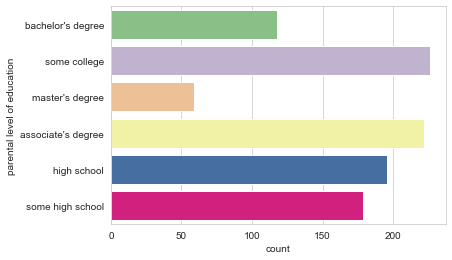

In [20]:
sns.set_style('whitegrid')
sns.countplot(y='parental level of education',data=train,palette='Accent')
plt.show()

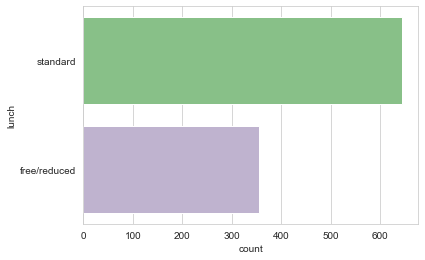

In [22]:
sns.set_style('whitegrid')
sns.countplot(y='lunch',data=train,palette='Accent')
plt.show()

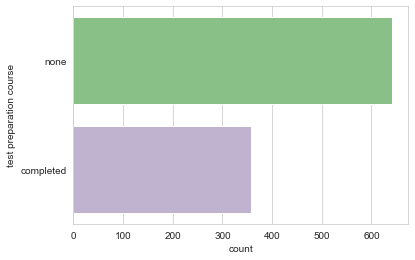

In [23]:
sns.set_style('whitegrid')
sns.countplot(y='test preparation course',data=train,palette='Accent')
plt.show()

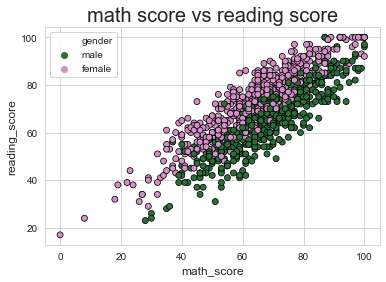

In [27]:
sns.set_style('whitegrid')
plt.title('math score vs reading score',size=20)
plt.xlabel('math score',size=12)
plt.ylabel('reading score',size=12)
sns.scatterplot(x='math_score',y='reading_score',data =train,hue='gender',edgecolor='black',palette='cubehelix',hue_order=['male','female'])
plt.show()

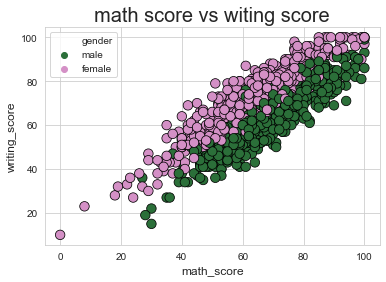

In [28]:
sns.set_style('whitegrid')
plt.title('math score vs witing score',size=20)
plt.xlabel('math score',size=12)
plt.ylabel('writing score',size=12)
sns.scatterplot(x='math_score',y='writing_score',data =train,hue='gender',s=90,edgecolor='black',palette='cubehelix',hue_order=['male','female'])
plt.show()

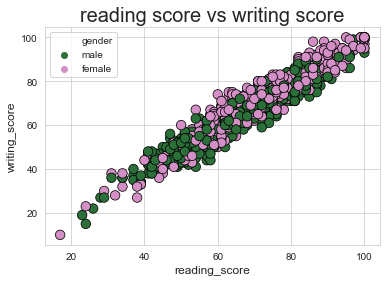

In [29]:
sns.set_style('whitegrid')
plt.title('reading score vs writing score',size=20)
plt.xlabel('reading score',size=12)
plt.ylabel('writing score',size=12)
sns.scatterplot(x='reading_score',y='writing_score',data =train,hue='gender',s=90,edgecolor='black',palette='cubehelix',hue_order=['male','female'])
plt.show()

In [33]:
total_marks = ((train['math_score'] + train['reading_score'] + train['writing_score'])/300)*100 #total marks are score of all subjects out of 100
train['total_marks'] = total_marks
kde_df = train[['math_score','reading_score','writing_score','total_marks']]


In [34]:
# how other features affect total marks

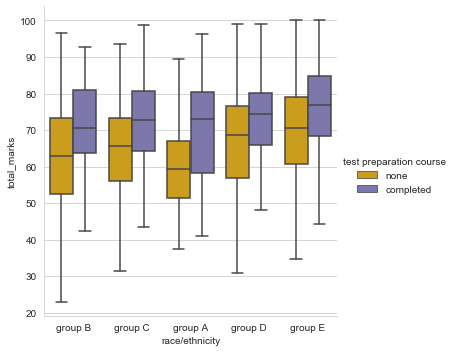

In [39]:
sns.catplot(x='race/ethnicity',y='total_marks',data =train,hue='test preparation course',palette='Dark2_r',kind='box',showfliers=False)
plt.show()


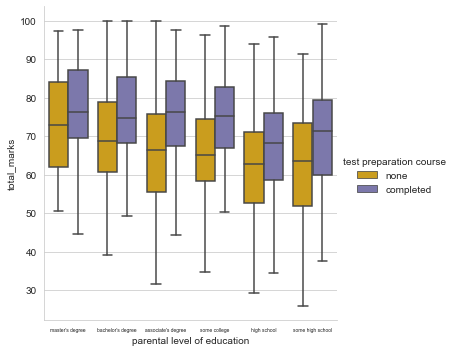

In [40]:
plt.rcParams["figure.figsize"] = (8, 4)
plt.rcParams["xtick.labelsize"] = 5
order = ["master's degree","bachelor's degree","associate's degree","some college","high school","some high school"]
sns.catplot(x='parental level of education',y='total_marks',data =train,hue='test preparation course',order=order,palette='Dark2_r',kind='box',showfliers=False)
plt.show()

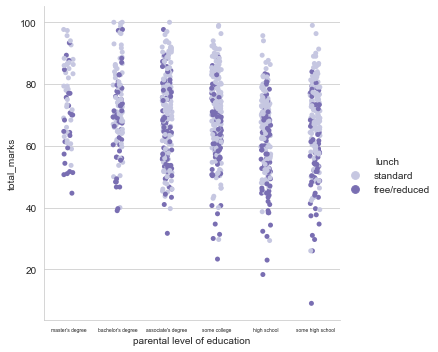

In [41]:
sns.catplot(x='parental level of education',y='total_marks',hue='lunch',data=train,order=order,palette='Purples')
plt.show()


In [49]:
train.drop(columns ='total_marks')

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [52]:
train.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [54]:
var = train.corr()

In [55]:
var

,math_score,reading_score,writing_score
math_score,1.000000,0.817580,0.802642
reading_score,0.817580,1.000000,0.954598
writing_score,0.802642,0.954598,1.000000


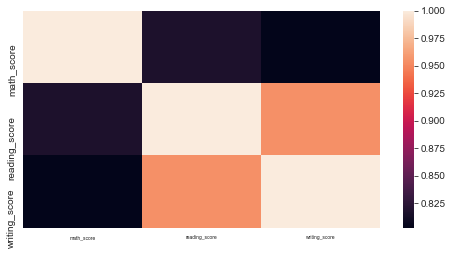

In [58]:
correlation=train.corr()
sns.heatmap(correlation)

In [64]:
from sklearn.preprocessing import LabelEncoder
lc = LabelEncoder()
train['gender'] = lc.fit_transform(train['gender'])
train['race/ethnicity'] = lc.fit_transform(train['race/ethnicity'])
train['parental level of education'] = lc.fit_transform(train['parental level of education'])
train['lunch'] = lc.fit_transform(train['lunch'])
train['test preparation course'] = lc.fit_transform(train['test preparation course'])
train.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math_score,reading_score,writing_score
0,0,1,1,1,1,72,72,74
1,0,2,4,1,0,69,90,88
2,0,1,3,1,1,90,95,93
3,1,0,0,0,1,47,57,44
4,1,2,4,1,1,76,78,75


In [65]:
X = train.values
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [66]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents1 = pca.fit_transform(X)

In [67]:
PCA_dataset1 = pd.DataFrame(data = principalComponents1, columns = ['component1', 'component2'] )
PCA_dataset1.head()

,component1,component2
0,-0.540404,-0.531658
1,-2.071393,-1.080768
2,-2.646408,-0.597316
3,2.739428,0.051952
4,-0.758780,1.233586


In [68]:
principal_component1 = PCA_dataset1['component1']
principal_component2 = PCA_dataset1['component2']

<Figure size 576x288 with 0 Axes>

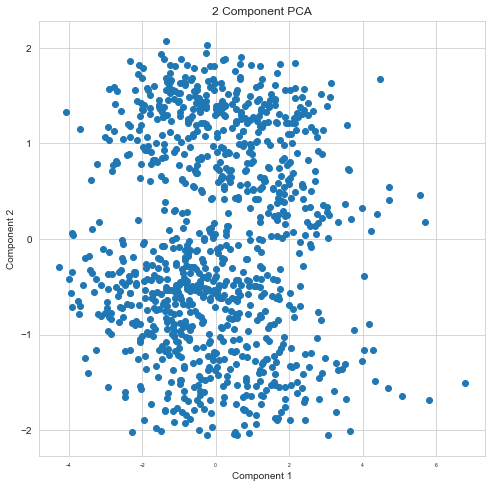

In [69]:
plt.figure()
plt.figure(figsize=(8,8))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('2 Component PCA')
plt.scatter(PCA_dataset1['component1'], PCA_dataset1['component2'])

In [71]:
print(train.shape)
print(train.columns)

(1000, 8)
Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')


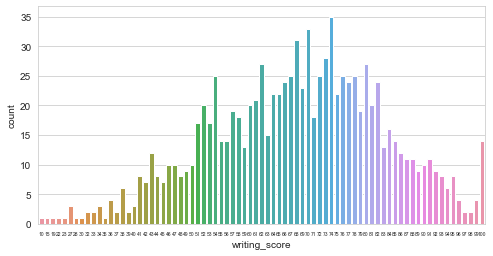

In [73]:
train['writing_score'].value_counts()
sns.countplot(x='writing_score',data=train)

In [78]:
train.groupby('writing_score').mean()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math_score,reading_score
writing_score,,,,,,,
10,0.000000,2.000000,5.000000,0.000000,1.000000,0.000000,17.00
15,1.000000,1.000000,2.000000,0.000000,1.000000,30.000000,24.00
19,1.000000,0.000000,4.000000,0.000000,1.000000,28.000000,23.00
22,1.000000,4.000000,5.000000,1.000000,1.000000,30.000000,26.00
23,0.000000,1.000000,2.000000,0.000000,1.000000,8.000000,24.00
...,...,...,...,...,...,...,...
96,0.000000,2.500000,3.250000,1.000000,0.750000,84.500000,95.50
97,0.000000,2.000000,4.500000,1.000000,0.500000,96.000000,96.00
98,0.000000,3.000000,2.000000,0.500000,0.000000,81.000000,87.50


In [81]:
total_students = train.shape[0]
students_score_more_than_50 = train[train['math_score'] > 50].shape[0]
probability_of_students_scoring_more_than_50_in_maths = (students_score_more_than_50/total_students)*100
print("Probability of Students Scoring more than 50 marks in Maths :",probability_of_students_scoring_more_than_50_in_maths)

Probability of Students Scoring more than 50 marks in Maths : 85.0


In [83]:
total_students = train.shape[0]
students_score_more_than_50 = train[train['reading_score'] > 50].shape[0]
probability_of_students_scoring_more_than_50_in_reading = (students_score_more_than_50/total_students)*100
print("Probability of Students Scoring more than 50 marks in Reading :", probability_of_students_scoring_more_than_50_in_reading)

Probability of Students Scoring more than 50 marks in Reading : 90.3


In [88]:
total_students = train.shape[0]
students_score_more_than_50 = train[train['writing_score'] > 50].shape[0]
probability_of_students_scoring_more_than_50_in_writing = (students_score_more_than_50/total_students)*100
print("Probability of Students Scoring more than 50 marks in Writing :",probability_of_students_scoring_more_than_50_in_writing)

Probability of Students Scoring more than 50 marks in Writing : 87.6


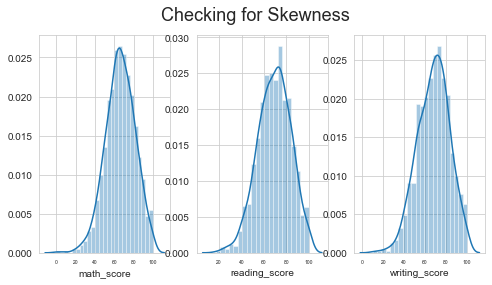

In [90]:
plt.subplot(1, 3, 1)
sns.distplot(train['math_score'])

plt.subplot(1, 3, 2)
sns.distplot(train['reading_score'])

plt.subplot(1, 3, 3)
sns.distplot(train['writing_score'])

plt.suptitle('Checking for Skewness', fontsize = 18)
plt.show()

In [93]:
# lets take seed so that everytime the random values come out to be constant
np.random.seed(6)
# lets take 100 sample values from the dataset of 1000 values
sample_math_marks = np.random.choice(a= train['math_score'], size=100)
# getting the sample mean
print ("Sample mean for Math Scores:", sample_math_marks.mean() )
# getting the population mean
print("Population mean for Math Scores:", train['math_score'].mean())
# lets take 100 sample values from the dataset of 1000 values
sample_reading_marks = np.random.choice(a= train['reading_score'], size=100)
print ("\nSample mean for Reading Scores:", sample_reading_marks.mean() )
# getting the population mean
print("Population mean for Reading Scores:", train['reading_score'].mean())
# lets take 100 sample values from the dataset of 1000 values
sample_writing_marks = np.random.choice(a= train['writing_score'], size=100)
# getting the sample mean
print ("\nSample mean for Writing Scores:", sample_math_marks.mean() )
# getting the population mean
print("Population mean for Writing Scores:", train['writing_score'].mean())

Sample mean for Math Scores: 63.12
Population mean for Math Scores: 66.089

Sample mean for Reading Scores: 68.5
Population mean for Reading Scores: 69.169

Sample mean for Writing Scores: 63.12
Population mean for Writing Scores: 68.054


In [98]:
import scipy.stats as stats
import math
# lets seed the random values
np.random.seed(10)
# lets take a sample size
sample_size = 1000
sample = np.random.choice(a= train['writing_score'],
size = sample_size)
sample_mean = sample.mean()
# Get the z-critical value*
z_critical = stats.norm.ppf(q = 0.95)
# Check the z-critical value
print("z-critical value: ",z_critical)
# Get the population standard deviation
pop_stdev = train['writing_score'].std()
# checking the margin of error
margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))
# defining our confidence interval
confidence_interval = (sample_mean - margin_of_error,
sample_mean + margin_of_error)
# lets print the results
print("Confidence interval:",end=" ")
print(confidence_interval)

print("True mean: {}".format(train['writing_score'].mean()))

z-critical value:  1.6448536269514722
Confidence interval: (66.80960035030861, 68.39039964969137)
True mean: 68.054


In [105]:
from scipy.stats import anderson
data1 = train['reading_score']
result = anderson(data1)
print('stat=%.3f' % (result.statistic))
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < cv:
        print('Probably Gaussian at the %.1f%% level' % (sl))
    else:
        print('Probably not Gaussian at the %.1f%% level' % (sl))

stat=1.021
Probably not Gaussian at the 15.0% level
Probably not Gaussian at the 10.0% level
Probably not Gaussian at the 5.0% level
Probably not Gaussian at the 2.5% level
Probably Gaussian at the 1.0% level


In [110]:
from scipy.stats import spearmanr
data1 = train['math_score']
data2 = train['gender']
stat, p = spearmanr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')
# Spearman’s Rank Correlation - Tests whether two samples have a monotonic relationship.

stat=0.160, p=0.000
Probably dependent


In [112]:
from statsmodels.tsa.stattools import adfuller
data1 = train['math_score']
stat, p, lags, obs, crit, t = adfuller(data1)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably not Stationary')
else:
    print('Probably Stationary')

stat=-32.600, p=0.000
Probably Stationary


In [114]:
from scipy.stats import ttest_ind
data1 = train['reading_score']
data2 = train['writing_score']
stat, p = ttest_ind(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=1.673, p=0.094
Probably the same distribution


In [115]:
from scipy.stats import f_oneway
data1 = train['reading_score']
data2 = train['writing_score']
data3 = train['math_score']
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=1.673, p=0.094
Probably the same distribution


In [117]:
train[(train['gender'] == 'female') &
(train['math_score'] > 90) &
(train['writing_score'] > 90) &
(train['reading_score'] > 90)]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math_score,reading_score,writing_score
114,female,group E,bachelor's degree,standard,completed,99,100,100
165,female,group C,bachelor's degree,standard,completed,96,100,100
179,female,group D,some high school,standard,completed,97,100,100
451,female,group E,some college,standard,none,100,92,97
458,female,group E,bachelor's degree,standard,none,100,100,100
546,female,group A,some high school,standard,completed,92,100,97
566,female,group E,bachelor's degree,free/reduced,completed,92,100,100
594,female,group C,bachelor's degree,standard,completed,92,100,99
685,female,group E,master's degree,standard,completed,94,99,100
712,female,group D,some college,standard,none,98,100,99


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000221CDB34608>,
      dtype=object)

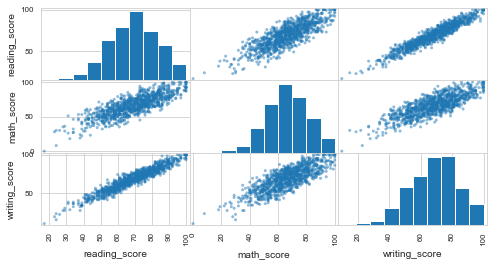

In [118]:
from pandas.plotting import scatter_matrix
scatter_matrix(train[['reading_score', 'math_score', 'writing_score']])

In [119]:
train.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [120]:
train['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [ ]:
# DATA CLEANING

In [121]:
train.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [122]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [124]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA,TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn
from sklearn import linear_model
reg = linear_model.LinearRegression()

In [130]:
x=train.drop(['gender','race/ethnicity','parental level of education','lunch','test preparation course'], axis=1)
y=train['math_score']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
x_train

,math_score,reading_score,writing_score
869,49,51,51
715,76,94,87
564,48,51,46
791,60,66,70
959,75,81,71
...,...,...,...
38,75,90,88
170,72,73,74
702,87,84,87
252,60,70,70


In [ ]:
Y_train

In [131]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
reg.fit(x_train, y_train)

LinearRegression()

In [132]:
pca = PCA(n_components=3, whiten='true')
x = pca.fit(x).transform(x)

In [133]:
pca.explained_variance_

array([610.12126748,  53.91836027,   9.95296685])

In [134]:
reg = linear_model.LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
reg.fit(x_train, y_train)
reg.score(x_test,y_test)

1.0

In [140]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [141]:
for i in train.columns:
    print(i,)

gender
race/ethnicity
parental level of education
lunch
test preparation course
math_score
reading_score
writing_score


In [142]:
from sklearn.preprocessing import LabelEncoder
lc = LabelEncoder()
train['gender'] = lc.fit_transform(train['gender'])
train['race/ethnicity'] = lc.fit_transform(train['race/ethnicity'])
train['parental level of education'] = lc.fit_transform(train['parental level of education'])
train['lunch'] = lc.fit_transform(train['lunch'])
train['test preparation course'] = lc.fit_transform(train['test preparation course'])
train.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math_score,reading_score,writing_score
0,0,1,1,1,1,72,72,74
1,0,2,4,1,0,69,90,88
2,0,1,3,1,1,90,95,93
3,1,0,0,0,1,47,57,44
4,1,2,4,1,1,76,78,75


In [143]:
X = train[['gender','race/ethnicity','parental level of education','lunch','test preparation course','math_score','reading_score']]
y = train['writing_score']

In [144]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [145]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_predictions = lr.predict(X_test)
print('Coefficients: \n', lr.coef_)

Coefficients: 
 [-5.97617058 -0.02325927 -0.17653074  0.29047544 -3.33057115  0.29316461
  0.66838769]


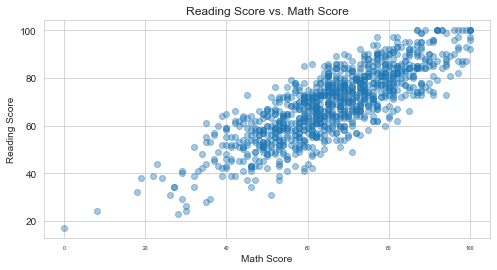

In [151]:
plt.scatter(train['math_score'],train['reading_score'],alpha=0.4)
plt.xlabel('Math Score')
plt.ylabel('Reading Score')
plt.title('Reading Score vs. Math Score')
plt.show()

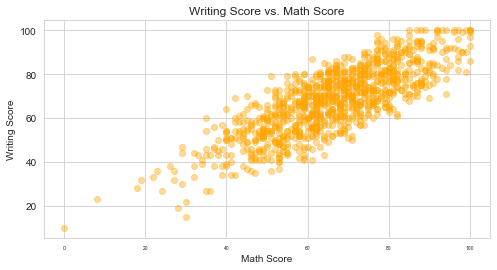

In [152]:
plt.scatter(train['math_score'],train['writing_score'],alpha=0.4,color='orange')
plt.xlabel('Math Score')
plt.ylabel('Writing Score')
plt.title('Writing Score vs. Math Score')
plt.show()

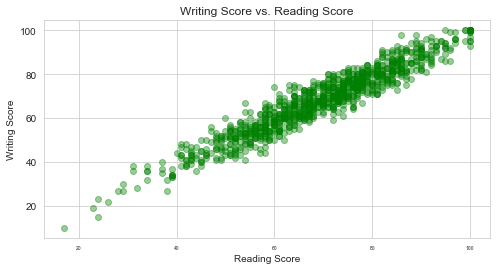

In [153]:
plt.scatter(train['reading_score'],train['writing_score'],alpha=0.4,color='green')
plt.xlabel('Reading Score')
plt.ylabel('Writing Score')
plt.title('Writing Score vs. Reading Score')
plt.show()

In [146]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('MAE:', metrics.mean_absolute_error(y_test, lr_predictions))
print('MSE:', metrics.mean_squared_error(y_test, lr_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lr_predictions)))
Linear_regression=r2_score(y_test,lr_predictions)*100
print("Model Accuracy of Linear Regression: ", r2_score(y_test,lr_predictions)*100,"%")

MAE: 3.02040433953137
MSE: 13.448799977953831
RMSE: 3.667260554958405
Model Accuracy of Linear Regression:  93.72009548996293 %


In [147]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state = 42)
dtr.fit(X_train,y_train)
dtr_predictions = dtr.predict(X_test) 
DecisionTreeRegression=r2_score(y_test,dtr_predictions)*100
# R^2 Score
print("Model Accuracy of Decision Tree Regression: ", r2_score(y_test,dtr_predictions)*100,"%")

Model Accuracy of Decision Tree Regression:  86.39154788995837 %


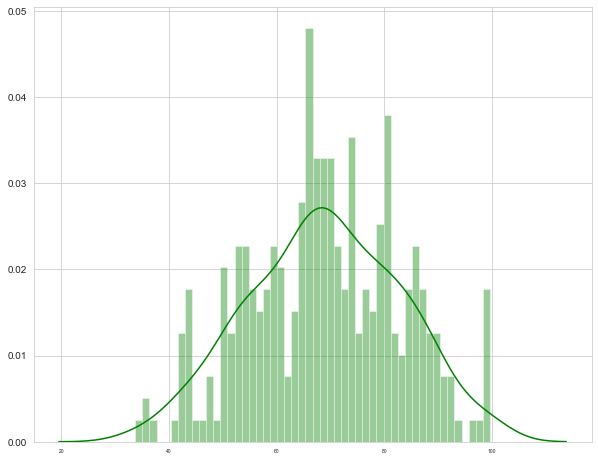

In [150]:
plt.figure(figsize=(10,8))
sns.distplot((rfr_predictions), bins = 50, color='green')

In [148]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 100)
rfr.fit(X_train,y_train)
rfr_predictions = rfr.predict(X_test) 
RandomForestRegreesion= r2_score(y_test,rfr_predictions)*100
# R^2 Score
print("Model Accuracy of Random Forest Regression: ", r2_score(y_test,rfr_predictions)*100 ,"%")

Model Accuracy of Random Forest Regression:  93.08802889406365 %


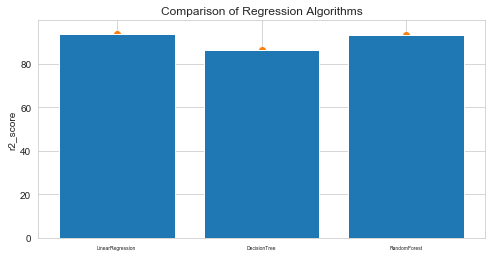

In [149]:
y = np.array([Linear_regression,DecisionTreeRegression,RandomForestRegreesion])
x = ["LinearRegression","DecisionTree","RandomForest"]
plt.bar(x,y)
plt.scatter(x,y)
plt.title("Comparison of Regression Algorithms")
plt.ylabel("r2_score")
plt.show()